In [ ]:
#######################################################################################
#### Script Python com Qiskit para Treinamento e Predição Usando um Simulador Quântico
#######################################################################################

In [1]:
import pandas as pd
import numpy as np

# Carregar o arquivo CSV
df = pd.read_csv("Training_Features.csv")

# Converter colunas preditoras para um array NumPy
features = df[['B2', 'B3', 'B4', 'NDVI']].values
#features = df[['B2', 'B8']].values

#features = df[['NDVI_1','NDVI_2','NDVI_3','NDVI_4','NDVI_5','NDVI_6']].values

# Converter a coluna 'classe' para um array NumPy
labels = df['classe'].values




In [2]:
len(df)

179

In [3]:
labels

array([2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2,
       1, 1, 1])

In [4]:
features

array([[0.02005   , 0.03455   , 0.02245   , 0.775067  ],
       [0.0218    , 0.0483    , 0.0251    , 0.8204299 ],
       [0.059     , 0.08375   , 0.1058    , 0.43986225],
       [0.0447    , 0.0708    , 0.0822    , 0.48016718],
       [0.02135   , 0.0485    , 0.02435   , 0.81207746],
       [0.0183    , 0.04      , 0.0199    , 0.83331263],
       [0.04345   , 0.0783    , 0.078     , 0.5227768 ],
       [0.04625   , 0.0764    , 0.0808    , 0.49096492],
       [0.0206    , 0.0425    , 0.0234    , 0.76744217],
       [0.0243    , 0.0498    , 0.0264    , 0.7830881 ],
       [0.0601    , 0.0833    , 0.1058    , 0.4271549 ],
       [0.0446    , 0.0754    , 0.0778    , 0.48019513],
       [0.0202    , 0.0344    , 0.0213    , 0.7857904 ],
       [0.0171    , 0.0417    , 0.0205    , 0.8186009 ],
       [0.0184    , 0.04195   , 0.02035   , 0.8388386 ],
       [0.0469    , 0.0733    , 0.0769    , 0.48582038],
       [0.0455    , 0.0671    , 0.0753    , 0.47504115],
       [0.02115   , 0.0475    ,

In [5]:
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler().fit_transform(features)

In [6]:
features

array([[0.11829026, 0.15103448, 0.0815565 , 0.80076052],
       [0.15308151, 0.34068966, 0.1098081 , 0.9030299 ],
       [0.89264414, 0.82965517, 0.97014925, 0.04505088],
       [0.6083499 , 0.65103448, 0.71855011, 0.13591721],
       [0.14413519, 0.34344828, 0.10181237, 0.88419956],
       [0.08349901, 0.2262069 , 0.054371  , 0.93207365],
       [0.58349901, 0.75448276, 0.67377399, 0.23197939],
       [0.63916501, 0.72827586, 0.70362473, 0.16026041],
       [0.12922465, 0.26068966, 0.09168443, 0.78357056],
       [0.2027833 , 0.36137931, 0.12366738, 0.81884386],
       [0.91451292, 0.82344828, 0.97014925, 0.01640252],
       [0.60636183, 0.71448276, 0.67164179, 0.13598022],
       [0.12127237, 0.14896552, 0.06929638, 0.82493612],
       [0.05964215, 0.24965517, 0.06076759, 0.89890647],
       [0.08548708, 0.25310345, 0.05916844, 0.94453179],
       [0.65208748, 0.68551724, 0.66204691, 0.14866219],
       [0.62425447, 0.6       , 0.64498934, 0.12436072],
       [0.14015905, 0.32965517,

In [7]:
#iris_data.feature_names

In [8]:
df.columns[:-1]

Index(['system:index', 'B2', 'B3', 'B4', 'B8', 'NDVI', 'classe'], dtype='object')

In [9]:
import ast

#column_list =[col for col in df.columns[:-2] if col != 'system:index']  # Exclui a última coluna 'classe'

column_list = ['B2', 'B3', 'B4','NDVI']
#column_list = ['NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6']


# Exibir a lista formatada
formatted_columns = repr(column_list).replace(",", ",\n ")

# Converter a string formatada de volta para uma lista real
formatted_list = ast.literal_eval(formatted_columns)

print(formatted_list)



['B2', 'B3', 'B4', 'NDVI']


In [10]:
type(formatted_list)

list

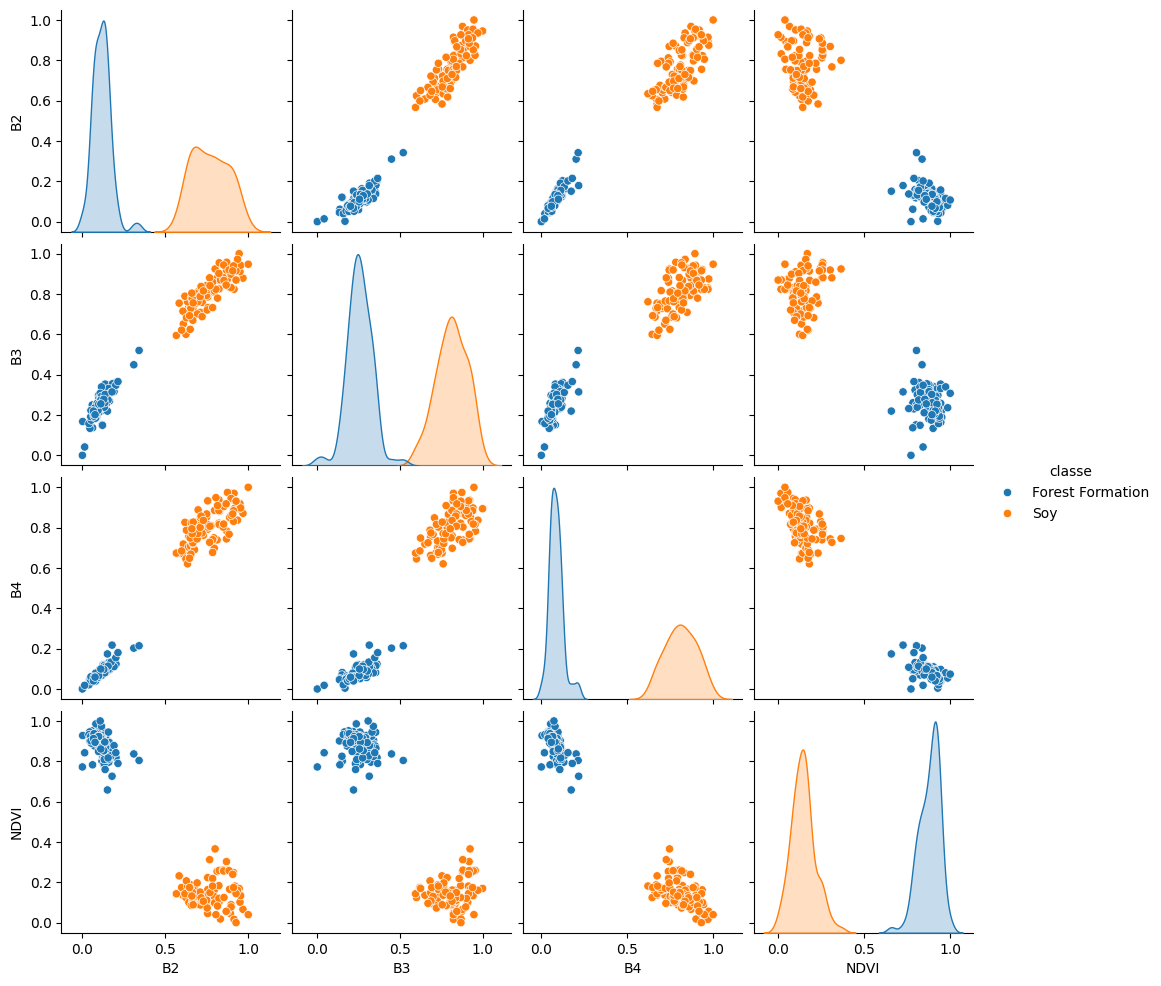

In [12]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(features, columns=formatted_list)
df["classe"] = pd.Series(labels)
df["classe"] = df["classe"].map({1: "Soy", 2: "Forest Formation"})

sns.pairplot(df, hue="classe", palette="tab10")

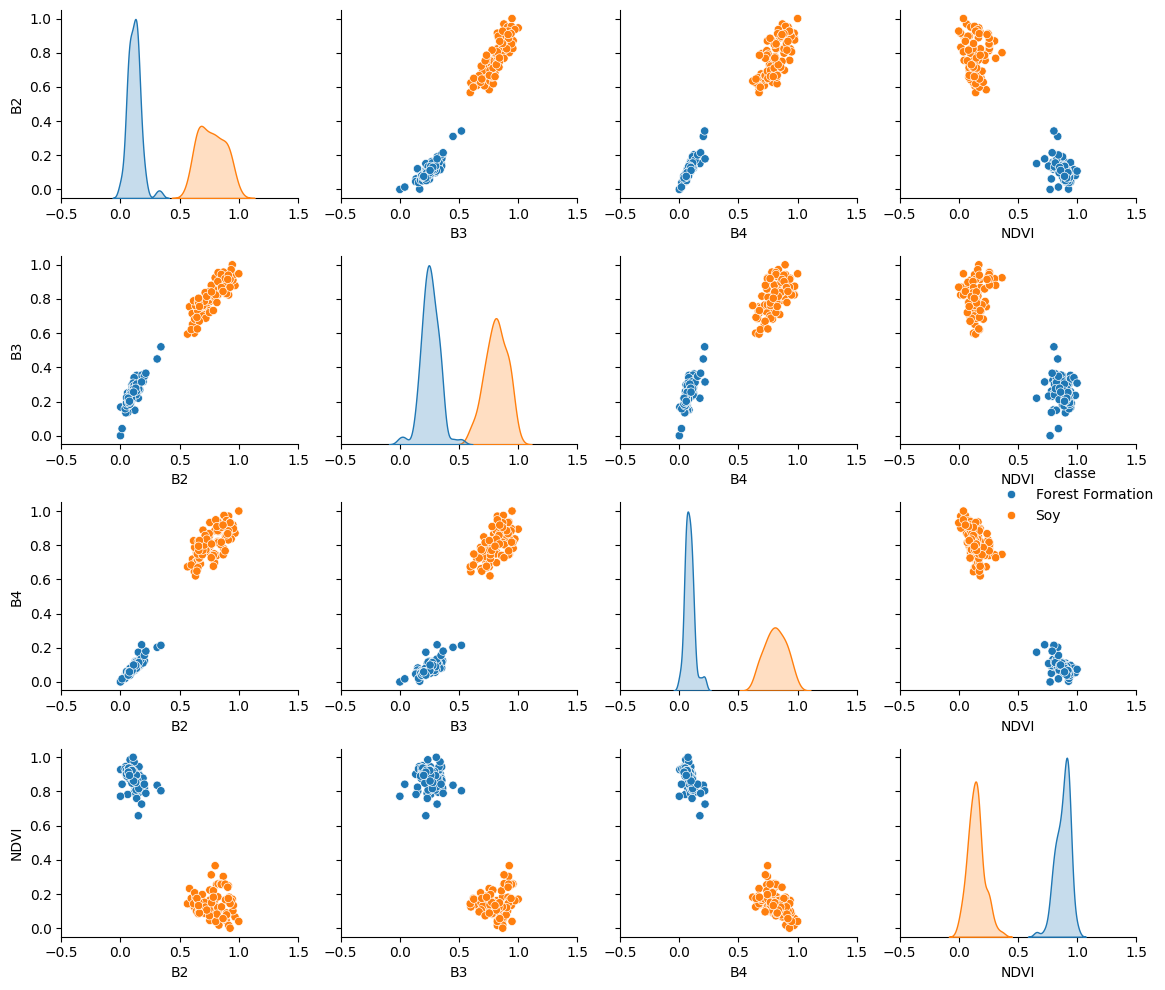

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'features' e 'labels' já estejam definidos
df = pd.DataFrame(features, columns=formatted_list)
df["classe"] = pd.Series(labels)
df["classe"] = df["classe"].map({1: "Soy", 2: "Forest Formation"})

# Criar o pairplot
g = sns.pairplot(df, hue="classe", palette="tab10")

# Iterar sobre os eixos para ativar os rótulos do eixo X em todos os subgráficos
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), visible=True)  # Forçar a visibilidade do rótulo X
    ax.set_xticks(ax.get_xticks())  # Garantir que os ticks do eixo X sejam exibidos
    ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True)  # Mostrar os valores do eixo X

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()

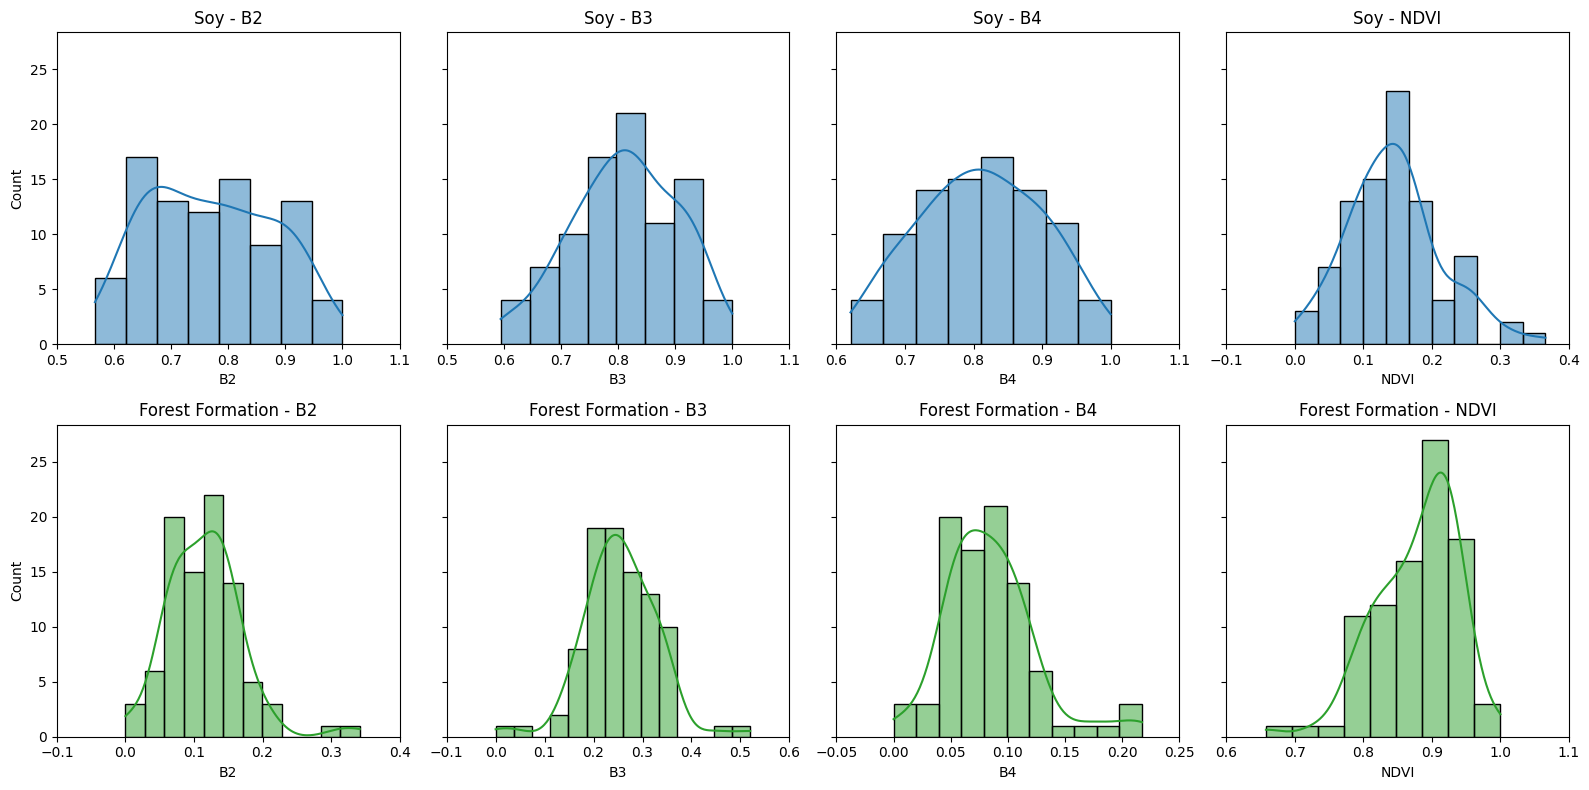

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'features' e 'labels' já estejam definidos
df = pd.DataFrame(features, columns=formatted_list)
df["classe"] = pd.Series(labels)
df["classe"] = df["classe"].map({1: "Soy", 2: "Forest Formation"})

# Separar os dados por classe
soy_df = df[df["classe"] == "Soy"]
forest_df = df[df["classe"] == "Forest Formation"]

# Configurar a figura com 2 linhas (uma por classe) e 4 colunas
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8), sharey=True)

# Lista de colunas para plotar (assumindo que formatted_list tem pelo menos 4 colunas)
columns_to_plot = formatted_list[:4]  # Pegar as primeiras 4 colunas

# Plotar para a classe "Soy" (primeira linha)
for i, col in enumerate(columns_to_plot):
    sns.histplot(data=soy_df, x=col, ax=axes[0, i], color="tab:blue", kde=True)
    axes[0, i].set_title(f"Soy - {col}")

# Plotar para a classe "Forest Formation" (segunda linha)
for i, col in enumerate(columns_to_plot):
    sns.histplot(data=forest_df, x=col, ax=axes[1, i], color="tab:green", kde=True)
    axes[1, i].set_title(f"Forest Formation - {col}")

# Ajustar os rótulos e layout
for ax in axes.flat:
    ax.set_xlabel(ax.get_xlabel(), visible=True)
    ax.set_xticks(ax.get_xticks())
    ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True)

plt.tight_layout()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from qiskit_machine_learning.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

In [496]:
#################################################
#################################################

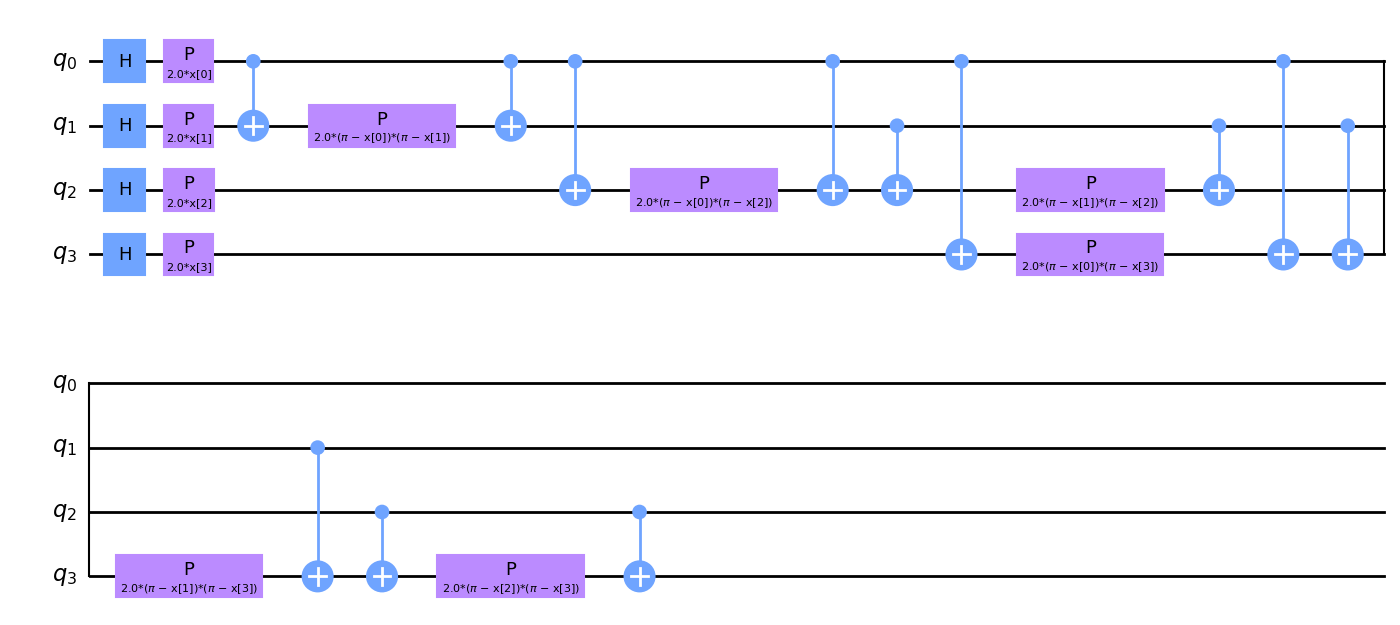

In [21]:
from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

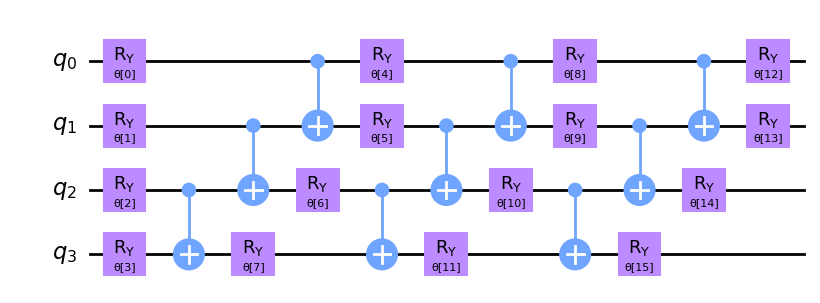

In [22]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

In [528]:
from qiskit_machine_learning.optimizers import COBYLA,GSLS
optimizer = COBYLA(maxiter=100)
#optimizer = GSLS(maxiter=100)


In [529]:
from qiskit.primitives import StatevectorSampler as Sampler

sampler = Sampler()
# Cria o Sampler utilizando o hardware real e define o número de shots
#sampler = Sampler(backend=backend, shots=8192)

In [530]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

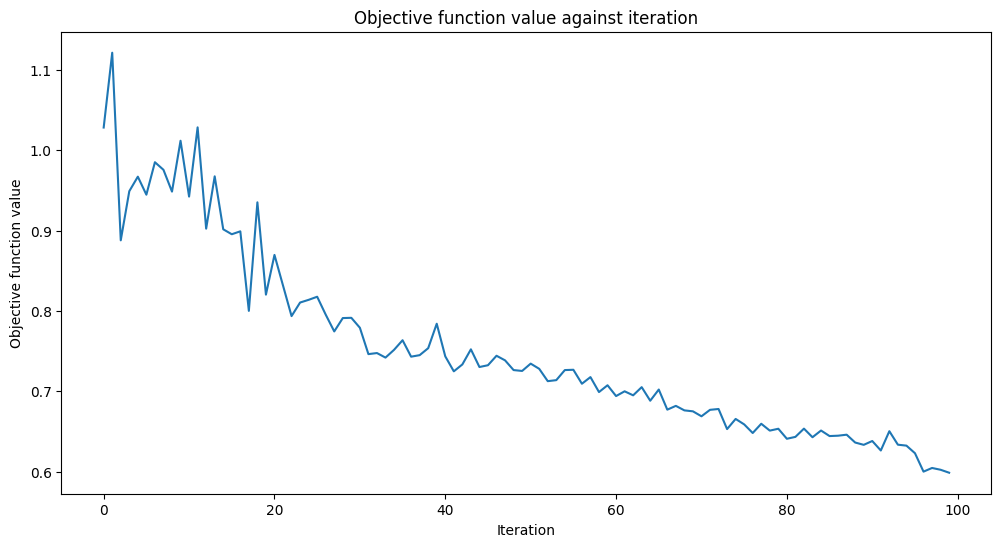

Training time: 193 seconds


In [531]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [532]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.99
Quantum VQC on the test dataset:     1.00


In [533]:
####################################################
####################################################

In [534]:
import pandas as pd

# Lê o arquivo CSV com as features para predição
df = pd.read_csv("Prediction_Features.csv")



In [535]:
df.head(5)

,system:index,B2,B3,B4,B8,NDVI,geo,prediction
0,0,0.01755,0.03300,0.01865,0.1711,0.807009,"{""geodesic"":false,""type"":""Point"",""coordinates""...",1
1,1,0.01480,0.02510,0.01590,0.1363,0.807997,"{""geodesic"":false,""type"":""Point"",""coordinates""...",1
2,2,0.01555,0.02900,0.01760,0.1235,0.788629,"{""geodesic"":false,""type"":""Point"",""coordinates""...",1
3,3,0.01895,0.03450,0.02040,0.1805,0.785579,"{""geodesic"":false,""type"":""Point"",""coordinates""...",1
4,4,0.01820,0.03455,0.01975,0.1845,0.815735,"{""geodesic"":false,""type"":""Point"",""coordinates""...",2


In [536]:
# Seleciona as colunas que serão usadas como entrada para o modelo
input_features = df[['B2', 'B3', 'B4', 'NDVI']]

# Realiza a predição com o modelo treinado
predictions = vqc.predict(input_features)

# Adiciona a coluna de predição ao DataFrame
df['prediction'] = predictions

# Salva o DataFrame com as predições em um novo arquivo CSV
df.to_csv("Prediction_Features_with_predictions_v2.csv", index=False)
